Here, we start Model training....

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(filepath='best_vgg16_model.keras', monitor='val_loss', save_best_only=True, verbose=1)

## CNN-cbis ddsm breast cancer dataset

# VGG16 Cbis

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load the VGG16 model without pre-trained weights (training from scratch)
base_model = VGG16(weights=None, include_top=False, input_shape=(224, 224, 3))

# Add custom top layers on top of VGG16
model_vgg16 = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')
])

# Compile the model
model_vgg16.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping and model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(filepath='best_vgg16_model.keras', monitor='val_loss', save_best_only=True, verbose=1)

# Train the model
history_vgg16 = model_vgg16.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_test, y_test),
    steps_per_epoch=len(X_train) // 32,
    epochs=50,
    callbacks=[early_stopping, model_checkpoint]
)
# Print the final accuracy and loss
final_loss, final_accuracy = model_vgg16.evaluate(X_test, y_test)
print(f'Final Validation Loss: {final_loss:.4f}')
print(f'Final Validation Accuracy: {final_accuracy:.4f}')

Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.5130 - loss: 0.7286
Epoch 1: val_loss improved from inf to 0.68574, saving model to best_vgg16_model.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 28s 442ms/step - accuracy: 0.5131 - loss: 0.7280 - val_accuracy: 0.6243 - val_loss: 0.6857
Epoch 2/50
 1/41 ━━━━━━━━━━━━━━━━━━━━ 8s 202ms/step - accuracy: 0.5625 - loss: 0.6910
Epoch 2: val_loss improved from 0.68574 to 0.68183, saving model to best_vgg16_model.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.5625 - loss: 0.6910 - val_accuracy: 0.5979 - val_loss: 0.6818
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - accuracy: 0.5457 - loss: 0.6899
Epoch 3: val_loss did not improve from 0.68183
41/41 ━━━━━━━━━━━━━━━━━━━━ 17s 356ms/step - accuracy: 0.5455 - loss: 0.6899 - val_accuracy: 0.5608 - val_loss: 0.6924
Epoch 4/50
 1/41 ━━━━━━━━━━━━━━━━━━━━ 7s 200ms/step - accuracy: 0.5938 - loss: 0.6905
Epoch 4: val_loss did not improve from 0.68183
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 19

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Make predictions
y_pred = model_vgg16.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # For multi-class classification

# Convert y_test to class labels if necessary
y_true = np.argmax(y_test, axis=1)  # For multi-class classification

unique_classes = np.unique(y_true)

# Get unique classes for labels
unique_classes = np.unique(y_true)

# Generate classification report
report = classification_report(y_true, y_pred_classes, labels=unique_classes, target_names=[f'Class {i}' for i in unique_classes])
print(report)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step
              precision    recall  f1-score   support

     Class 0       0.48      0.54      0.51       147
     Class 1       0.69      0.63      0.66       231

    accuracy                           0.60       378
   macro avg       0.59      0.59      0.59       378
weighted avg       0.61      0.60      0.60       378

Precision: 0.61
Recall: 0.60
F1 Score: 0.60


In [ ]:
# Evaluate the model on the test data after training
final_loss, final_accuracy = model_vgg16.evaluate(X_test, y_test)

# Print the overall accuracy
print(f'Final Overall Accuracy: {final_accuracy:.4f}')

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.6198 - loss: 0.6436
Final Overall Accuracy: 0.5979


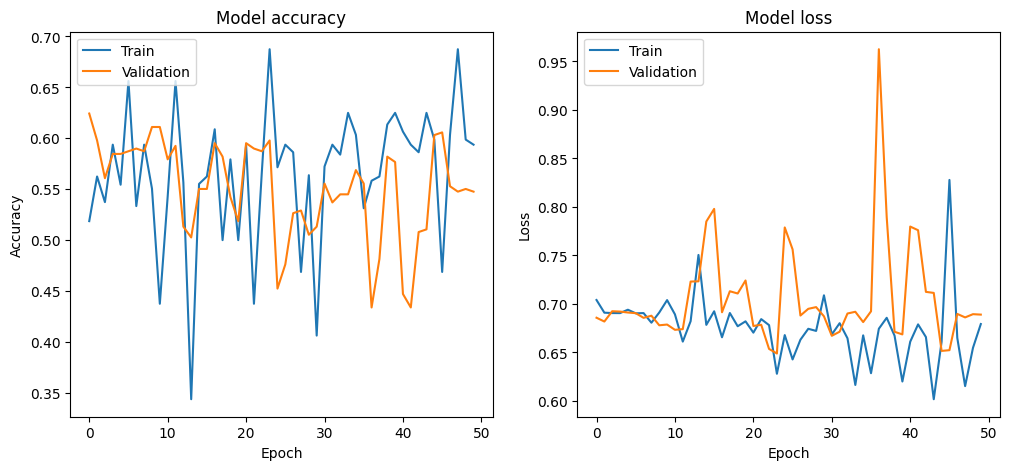

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_vgg16.history['loss'])
plt.plot(history_vgg16.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


# Transfer Learning : A Step-by-Step Approach to Model Training and Fine-Tuning

# ResNet50 Cbis

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the ResNet50 model, excluding the top (fully connected) layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model to prevent them from being trained
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)  # Output layer for binary classification

# Create the new model
model_resnet_TL = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with a lower learning rate
model_resnet_TL.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with the augmented data
history = model_resnet_TL.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_test, y_test),  # Use test data for validation
    steps_per_epoch=len(X_train) // 32,
    epochs=30,
    callbacks=[early_stopping, model_checkpoint]
)

# Optionally, unfreeze some layers of the base model for fine-tuning
for layer in base_model.layers[-4:]:  # Unfreeze the last 4 layers
    layer.trainable = True

# Recompile the model after unfreezing layers
model_resnet_TL.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

# Continue training the model with the unfrozen layers
history_ResNet50 = model_resnet_TL.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_test, y_test),
    steps_per_epoch=len(X_train) // 32,
    epochs=50,
    callbacks=[early_stopping, model_checkpoint]
)

# Evaluate the model
final_loss_resnet50, final_accuracy_resnet50 = model_resnet_TL.evaluate(X_test, y_test)
print(f'Final Validation Loss (ResNet50 with Transfer learning): {final_loss_resnet50:.4f}')
print(f'Final Validation Accuracy (ResNet50 with Transfer learning): {final_accuracy_resnet50:.4f}')


Epoch 1/30


I0000 00:00:1725024427.341255      80 service.cc:145] XLA service 0x7e9814003190 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725024427.341336      80 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 2/41 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.6250 - loss: 0.8122  

I0000 00:00:1725024432.544456      80 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - accuracy: 0.5553 - loss: 0.7160
Epoch 1: val_loss improved from inf to 0.65656, saving model to best_vgg16_model.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 38s 576ms/step - accuracy: 0.5556 - loss: 0.7155 - val_accuracy: 0.6217 - val_loss: 0.6566
Epoch 2/30
 1/41 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.5000 - loss: 0.7437
Epoch 2: val_loss improved from 0.65656 to 0.65423, saving model to best_vgg16_model.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5000 - loss: 0.7437 - val_accuracy: 0.6243 - val_loss: 0.6542
Epoch 3/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.6381 - loss: 0.6500
Epoch 3: val_loss improved from 0.65423 to 0.64731, saving model to best_vgg16_model.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 17s 350ms/step - accuracy: 0.6376 - loss: 0.6500 - val_accuracy: 0.6349 - val_loss: 0.6473
Epoch 4/30
 1/41 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.5938 - loss: 0.6728
Epoch 4: val_loss improved from 0.64731 to 0.634

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Make predictions
y_pred = model_resnet_TL.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # For multi-class classification

# Convert y_test to class labels if necessary
y_true = np.argmax(y_test, axis=1)  # For multi-class classification

unique_classes = np.unique(y_true)

# Get unique classes for labels
unique_classes = np.unique(y_true)

# Generate classification report
report = classification_report(y_true, y_pred_classes, labels=unique_classes, target_names=[f'Class {i}' for i in unique_classes])
print(report)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
              precision    recall  f1-score   support

     Class 0       0.59      0.52      0.56       147
     Class 1       0.72      0.77      0.74       231

    accuracy                           0.67       378
   macro avg       0.66      0.65      0.65       378
weighted avg       0.67      0.67      0.67       378

Precision: 0.67
Recall: 0.67
F1 Score: 0.67


In [ ]:
# Evaluate the model on the test data after training
final_loss, final_accuracy = model_resnet_TL.evaluate(X_test, y_test)

# Print the overall accuracy
print(f'Final Overall Accuracy: {final_accuracy:.4f}')


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6808 - loss: 0.5818
Final Overall Accuracy: 0.6746


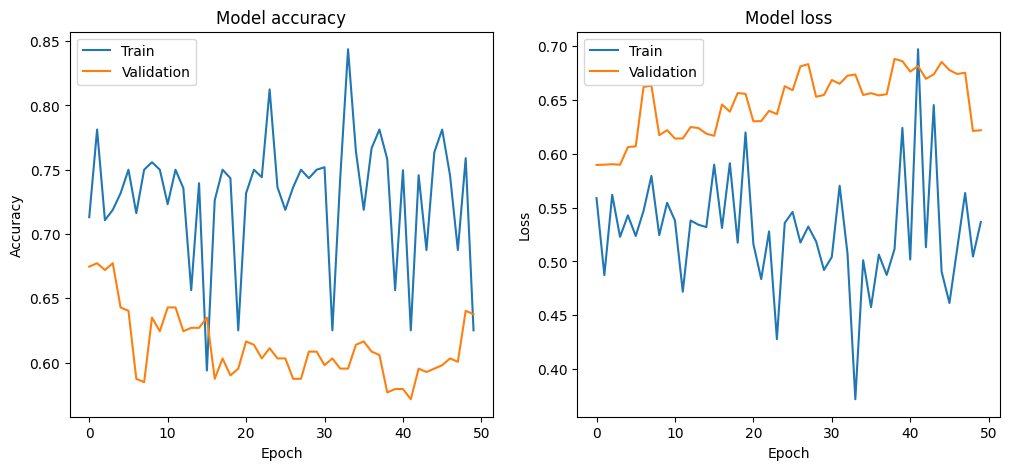

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_ResNet50.history['accuracy'])
plt.plot(history_ResNet50.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_ResNet50.history['loss'])
plt.plot(history_ResNet50.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


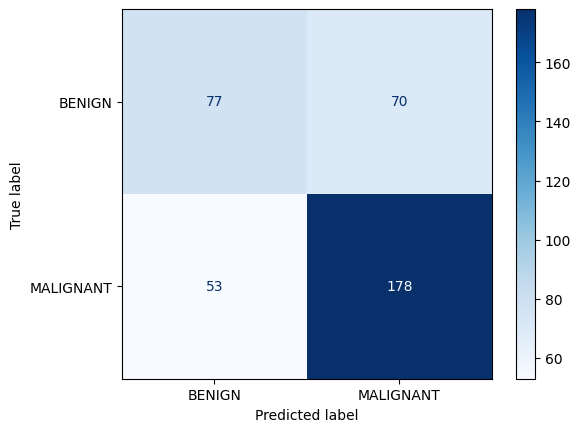

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predict the labels of the test dataset
y_pred = model_resnet_TL.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['BENIGN', 'MALIGNANT'])
disp.plot(cmap=plt.cm.Blues)
plt.show()


# EfficientNetB0 Cbis

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the EfficientNet model, excluding the top (fully connected) layers
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model to prevent them from being trained
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)  # Output layer for binary classification

# Create the new model
model_efficient_TL = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with a lower learning rate
model_efficient_TL.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with the augmented data
history = model_efficient_TL.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_test, y_test),  # Use test data for validation
    steps_per_epoch=len(X_train) // 32,
    epochs=30,
    callbacks=[early_stopping, model_checkpoint]
)

# Optionally, unfreeze some layers of the base model for fine-tuning
for layer in base_model.layers[-4:]:  # Unfreeze the last 4 layers
    layer.trainable = True

# Recompile the model after unfreezing layers
model_efficient_TL.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

# Continue training the model with the unfrozen layers
history_finetune = model_efficient_TL.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_test, y_test),
    steps_per_epoch=len(X_train) // 32,
    epochs=50,
    callbacks=[early_stopping, model_checkpoint]
)

# Evaluate the model
final_loss_efficientnet1, final_accuracy_efficientnet1 = model_efficient_TL.evaluate(X_test, y_test)
print(f'Final Validation Loss (EfficientNetB0 with Transfer learning): {final_loss_efficientnet1:.4f}')
print(f'Final Validation Accuracy (EfficientNetB0 with Transfer learning): {final_accuracy_efficientnet1:.4f}')

Epoch 1/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 644ms/step - accuracy: 0.5388 - loss: 0.7057
Epoch 1: val_loss did not improve from 0.64885
41/41 ━━━━━━━━━━━━━━━━━━━━ 61s 819ms/step - accuracy: 0.5391 - loss: 0.7054 - val_accuracy: 0.5847 - val_loss: 0.6613
Epoch 2/30
 1/41 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5312 - loss: 0.6560
Epoch 2: val_loss did not improve from 0.64885
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5312 - loss: 0.6560 - val_accuracy: 0.6058 - val_loss: 0.6588
Epoch 3/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - accuracy: 0.5947 - loss: 0.6682
Epoch 3: val_loss did not improve from 0.64885
41/41 ━━━━━━━━━━━━━━━━━━━━ 16s 319ms/step - accuracy: 0.5950 - loss: 0.6680 - val_accuracy: 0.5979 - val_loss: 0.6515
Epoch 4/30
 1/41 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.6875 - loss: 0.6218
Epoch 4: val_loss did not improve from 0.64885
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6875 - loss: 0.6218 - val_accuracy: 0.5979 - val_loss: 0.6489
Epoc

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Make predictions
y_pred = model_efficient_TL.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # For multi-class classification

# Convert y_test to class labels if necessary
y_true = np.argmax(y_test, axis=1)  # For multi-class classification

unique_classes = np.unique(y_true)

# Get unique classes for labels
unique_classes = np.unique(y_true)

# Generate classification report
report = classification_report(y_true, y_pred_classes, labels=unique_classes, target_names=[f'Class {i}' for i in unique_classes])
print(report)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 399ms/step
              precision    recall  f1-score   support

     Class 0       0.57      0.47      0.52       147
     Class 1       0.70      0.78      0.74       231

    accuracy                           0.66       378
   macro avg       0.64      0.62      0.63       378
weighted avg       0.65      0.66      0.65       378

Precision: 0.65
Recall: 0.66
F1 Score: 0.65


In [ ]:
# Evaluate the model on the test data after training
final_loss, final_accuracy = model_efficient_TL.evaluate(X_test, y_test)

# Print the overall accuracy
print(f'Final Overall Accuracy: {final_accuracy:.4f}')


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6493 - loss: 0.6037
Final Overall Accuracy: 0.6587


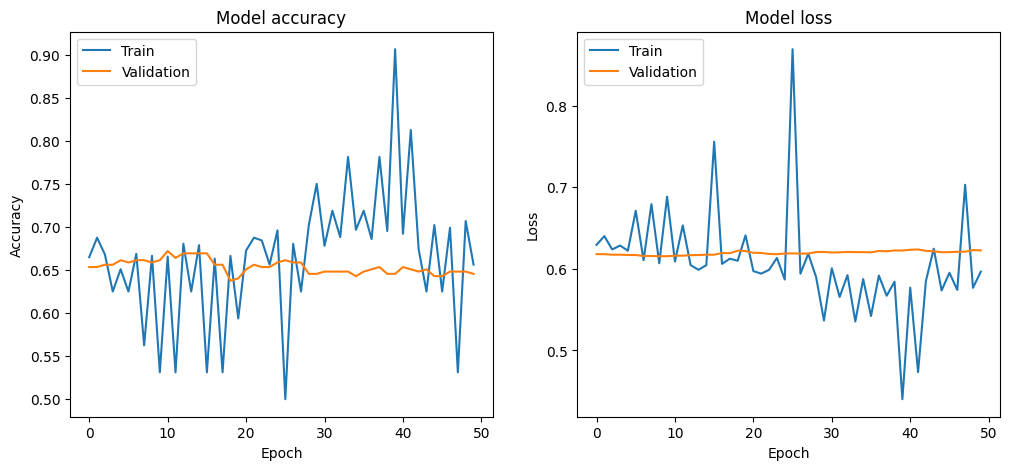

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_finetune.history['accuracy'])
plt.plot(history_finetune.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_finetune.history['loss'])
plt.plot(history_finetune.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


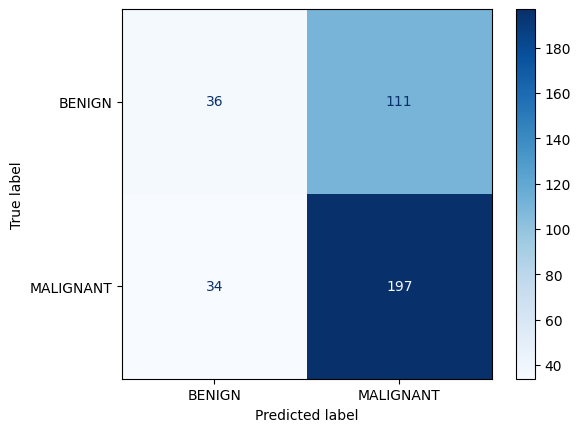

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predict the labels of the test dataset
y_pred = model_efficient_TL.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['BENIGN', 'MALIGNANT'])
disp.plot(cmap=plt.cm.Blues)
plt.show()


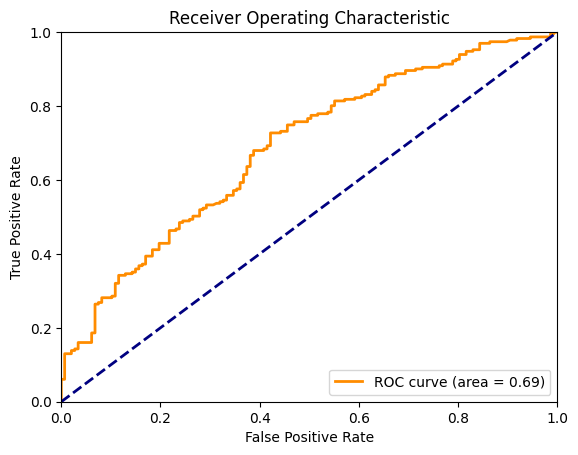

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_true, y_pred[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()
